<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif" data-toc-modified-id="Objectif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Import-data-et-Prise-en-Main-Dataset" data-toc-modified-id="Import-data-et-Prise-en-Main-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data et Prise en Main Dataset</a></span></li><li><span><a href="#Manipulation-de-data" data-toc-modified-id="Manipulation-de-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manipulation de data</a></span></li><li><span><a href="#Stationarité" data-toc-modified-id="Stationarité-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationarité</a></span></li><li><span><a href="#Split-le-data-set" data-toc-modified-id="Split-le-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Split le data set</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Comment-faire-le-split" data-toc-modified-id="Comment-faire-le-split-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Comment faire le split</a></span></li></ul></li><li><span><a href="#Boostraping" data-toc-modified-id="Boostraping-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Boostraping</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Préparation-de-données-pour-le-MLP" data-toc-modified-id="Préparation-de-données-pour-le-MLP-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Préparation de données pour le MLP</a></span></li></ul></div>

## Objectif
L'objectif de ce cours est de se familiariser avec les séries temporelles. 
- Qu'est ce que c'est? 
- Comment les manipuler? 
- Gérer des données manquantes? 
- Faire des plots

==> correction publié à la fin du cours

## Import
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Import data et Prise en Main Dataset
- (1) Importez les donées en utilisant **pd.read_csv**
- (2) Affichez le nombre pays disponibles
- (3) Affichez le nombre de jours et années couvert par le dataset
    - Tips: utiliser la fonction **pd.to_datetime()**
- (4) Changer la forme de la dataframe en ayant la date (dt) en index, les Temperatures moyennes (AverageTemperature) en valeurs et les pays (Country) en column
    - Tips: utiliser la fonction **pd.pivot()**
    
- (5) Selectionner uniquement les pays suivants: France, Germany, Belgium, United Kingdom, United States, Argentina

Nombre de pays disponibles: 243
Nombre de jours: 98555 days 00:00:00
Nombre d'anées: 270 days 00:19:43.561643836


## Manipulation de data
- (1) Combien de données sont manquantes par pays?
- (2) Comblez les données en utilisant **ffill()** et **bfill()**
    - Verifiez le nombre de données manquantes
- (3) Même chose en essayant en utilisant **interpolate()**
    - Essayez différentes méthodes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html  
    
- (4) Supprimer les lignes contenant des valeurs manquantes
    - Tips: utiliser **dropna()**
    
- (5) Comparez la moyenne de toutes ces méthodes
- (6) Vérifier s'il y a des duplicata de données
    - Tips **duplicated()**

Country
France              73
Germany             73
Belgium             73
United States      757
United Kingdom      73
Argentina         1339
dtype: int64

Country
France            0
Germany           0
Belgium           0
United States     0
United Kingdom    0
Argentina         0
dtype: int64
Country
France               1
Germany              1
Belgium              1
United States      298
United Kingdom       1
Argentina         1339
dtype: int64
Country
France               0
Germany              0
Belgium              0
United States      298
United Kingdom       0
Argentina         1338
dtype: int64
Country
France            0
Germany           0
Belgium           0
United States     0
United Kingdom    0
Argentina         0
dtype: int64
Duplicata: 72
Duplicata: 0


# 4 Resampling
- (1) Utiliser la fonction resample pour changer la granularité de la TS
- (2) Faire un plot de la température moyenne en France, en mois, années et quarter
- (3) Utiliser la fonction moving average sur 12 et comparez la au resample années
    - Tips **rolling()**
    
- (4) Créer une nouvelle columns avec le mois correspondant à l'index
    - Tips **df.index.month**
    
- (5) Faire la moyenne par mois de la times series
    - Tips **groupby()**
    
- (6) Faire un plot de la moyenne par mois pour la France et l'Argentine

- (7) Jouer avec le data set, l'objectif est de le prendre en main et de le comprendre. C'est ce qu'on appelle du data mining. Il est indispensable d'avoir une compréhension poussé du data set pour pouvoir le prédire. Chercher la température maximum par pays, pour tous les pays, la minimum, l'année la plus chaude, le mois

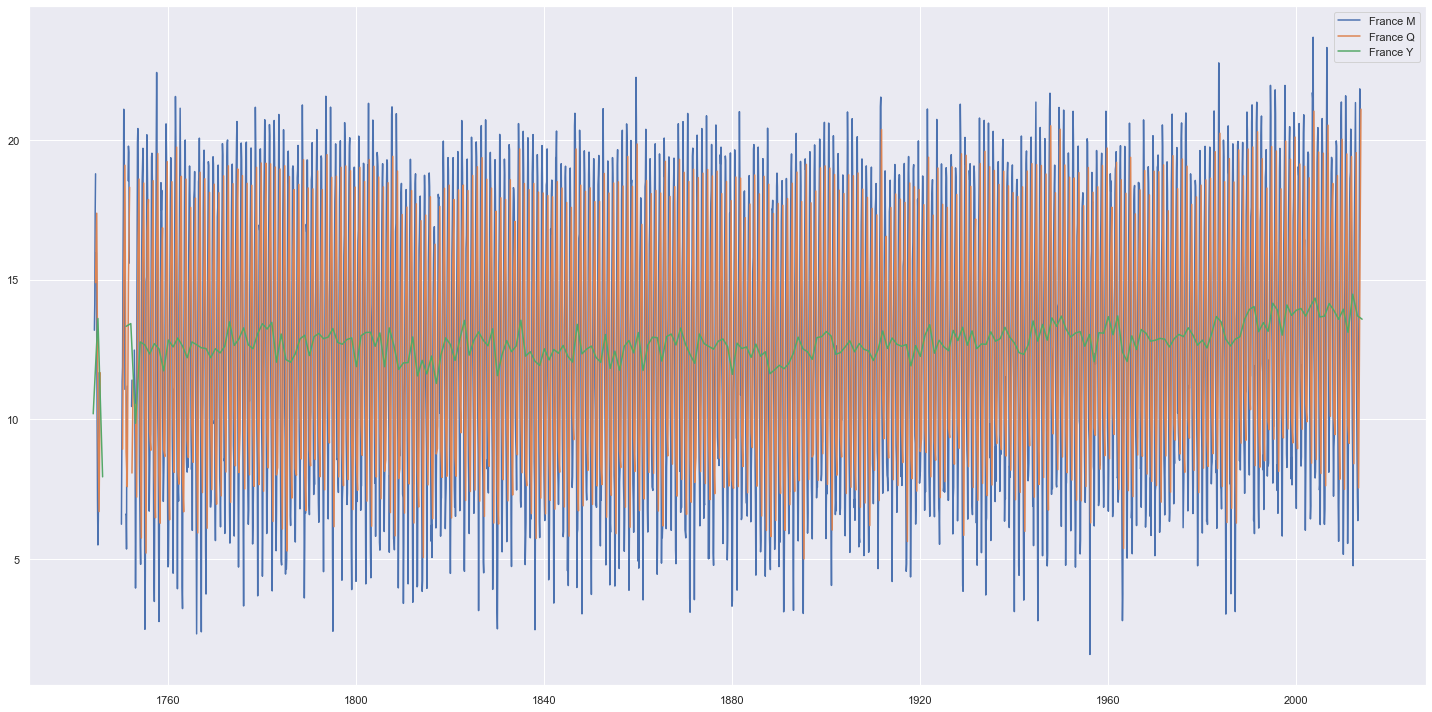

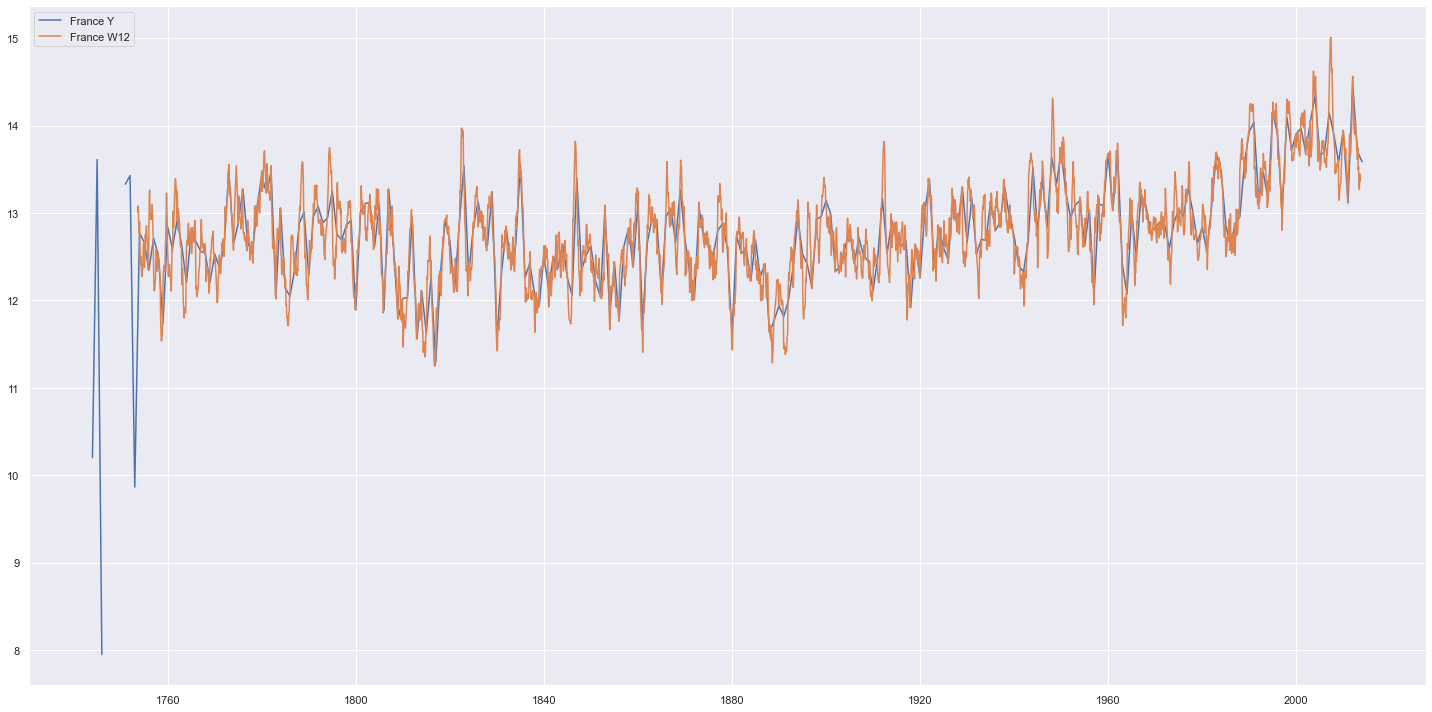

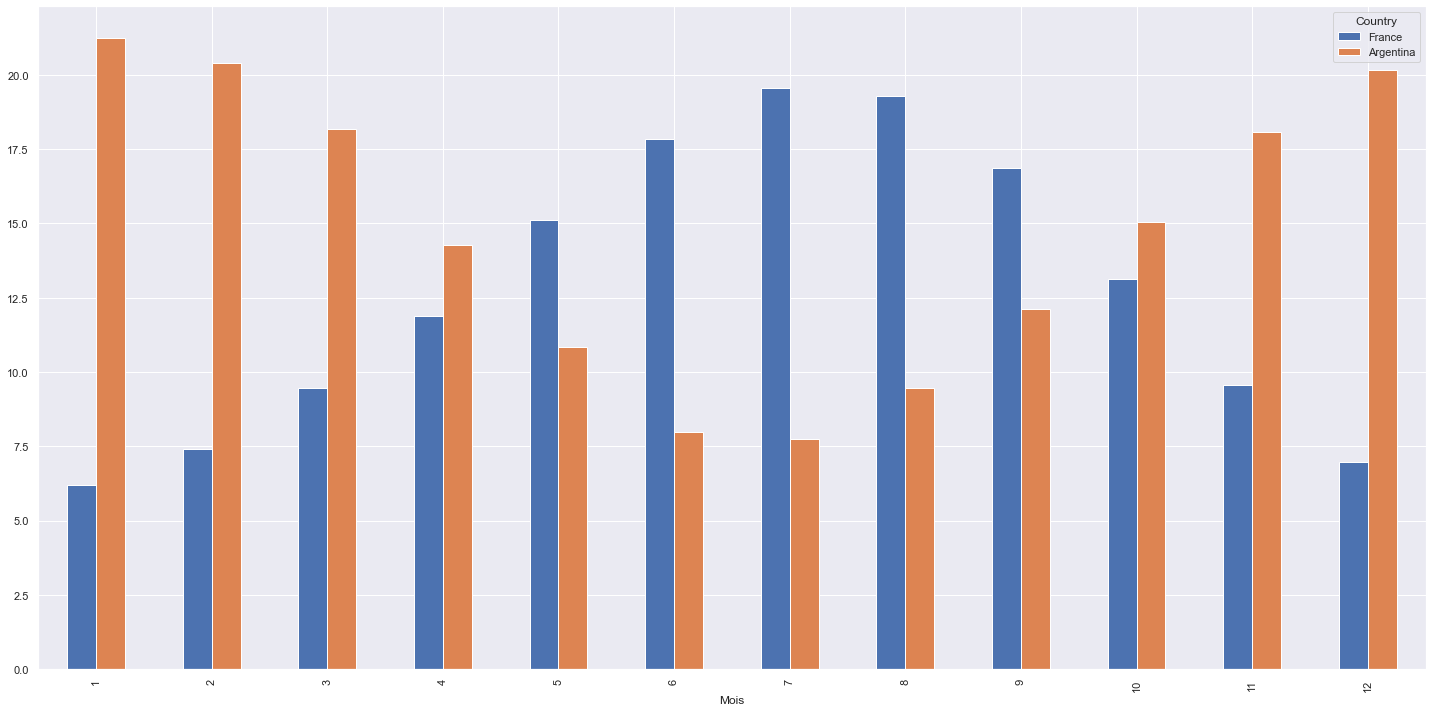

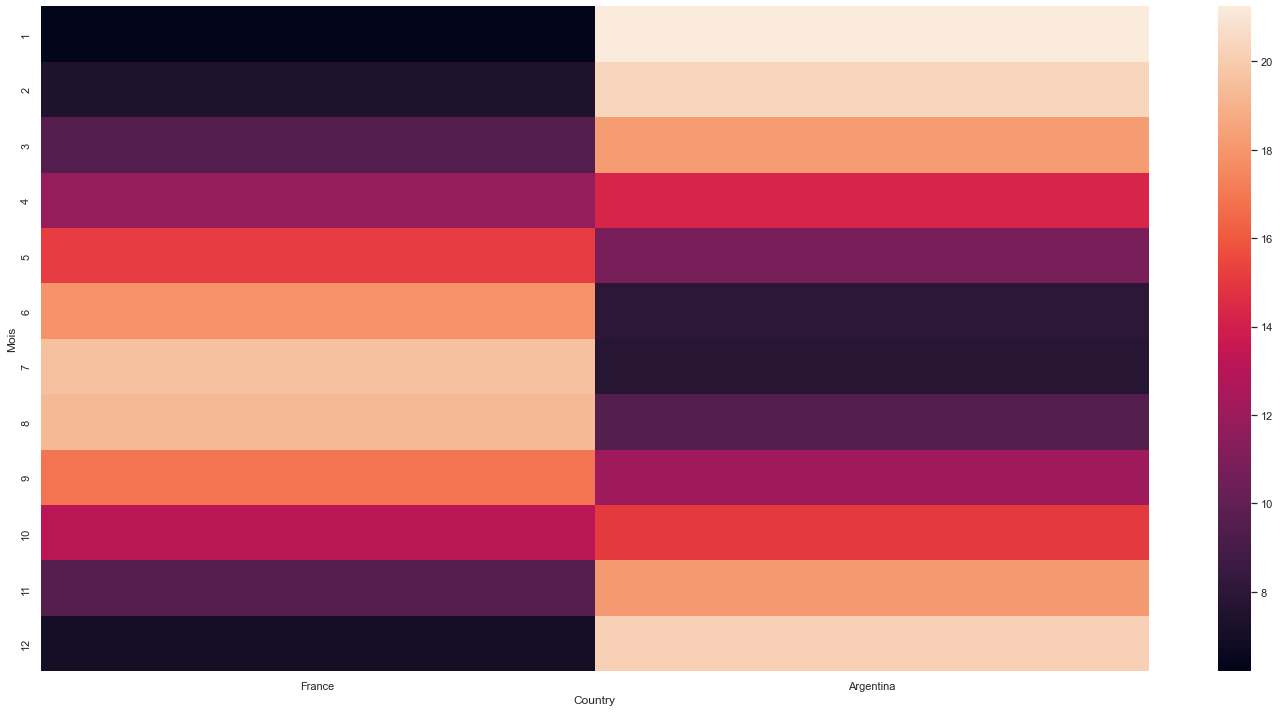

## Stationarité
Dans le cas de série temporelle, il est possible que les données dépendent du temps, c'est à dire que l'évolution n'est pas stable. Prenons notre exemple de températures moyennes, est ce que la température sur 10 ans évolue de la même façon au XVIIIeme siècle et et XXeme?



- (1) Faire la moyenne lissée de la température par an pour la France puis faire sur le même plot
    - 1850-1900 et 1950-2000
- (2) Faire la moyenne lissée de la température sur 10 ans pour la France puis faire sur le même plot
    - 1850-1900 et 1950-2000
    
    
Or dans le cas de Machine Learning et de prédiction, nous avons besoin de nous assurer que notre algorithme peut aussi bien prédire la température en 1850 qu'en 2030 mais aussi en 2100. On a donc besoin que nos données soient stationnaires, c'est à dire sans tendance mais aussi sans effet saisonnal comme par exemple les températures hivernales. Pour ce faire on peut utiliser le test statistique **adfuller** qui va tester la stationnarité de nos séries temporelles. Si la p-value est inférieur à 0.05 la série est considéré comme stationnaire autrement elle est non stationnaire et nous devons la rendre stationnaire.

- (3) Utiliser la fonction adfuller de statsmodel pour savoir si la température moyenne en France est stationnaire
    - Tips: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
    
    
- (4) Liser le nouveau data set qui comprend le nombre de passager en avion par mois (airline-passengers.csv)
- (5) Faire un plot de l'évolution en fonction des mois de l'année 
- (6) Refaire le test adfuller


Quand une série temporelle est non stationnaire il y a plusieurs façon de la transformer tout en gardant nos la variance de nos données. L'une des façon la plus simple est de faire la différence entre la valeur n et n+1. Cela permet non plus d'avoir une série temporelle en valeur absolue mais d'avoir l'évolution au cours du temps. Il est aussi possible de faire une transformation logarithmique, ou expodentielle dépendant des données

- (7) Faire la différence entre n et n+1 puis refaire le test adfuller
    - Tips: utiliser .diff()
    
- (8) Faire la différence entre n et n+20 puis refaire le test adfuller
    - Tips: utiliser .diff()

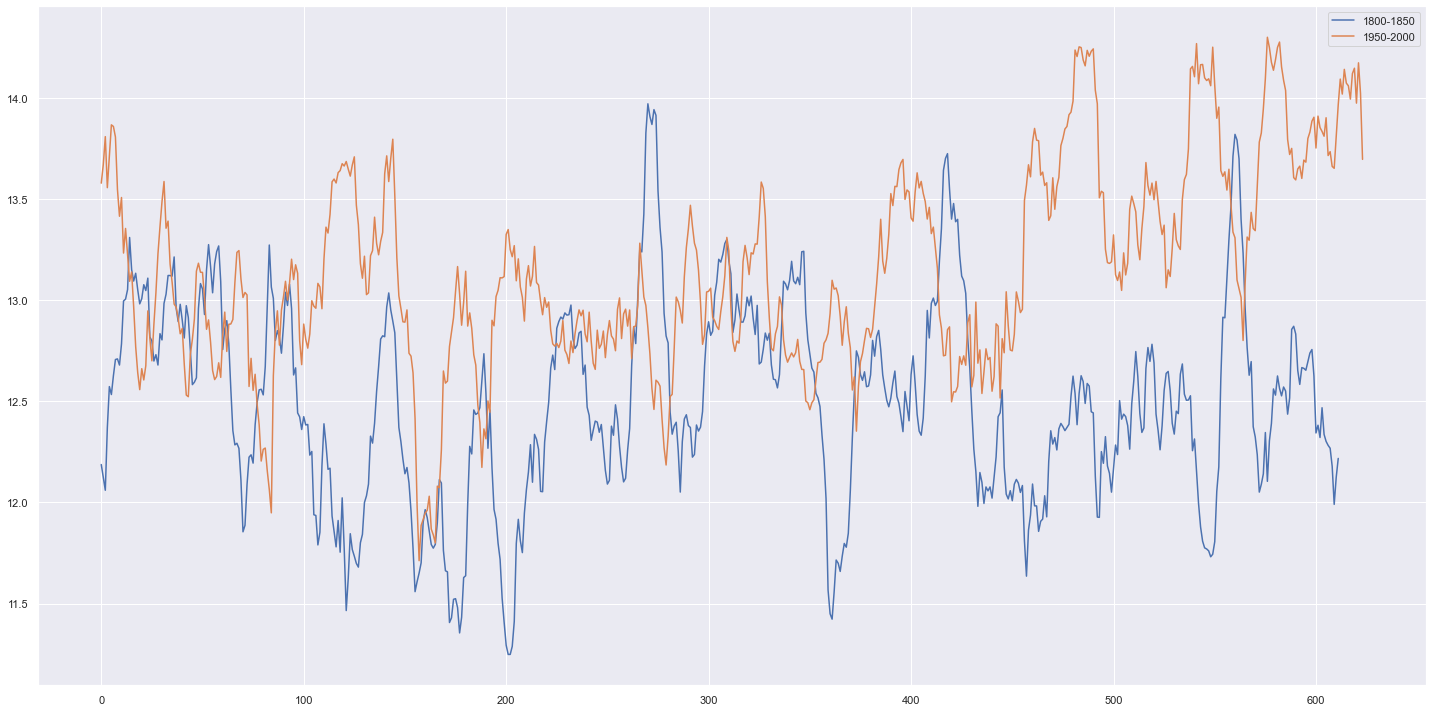

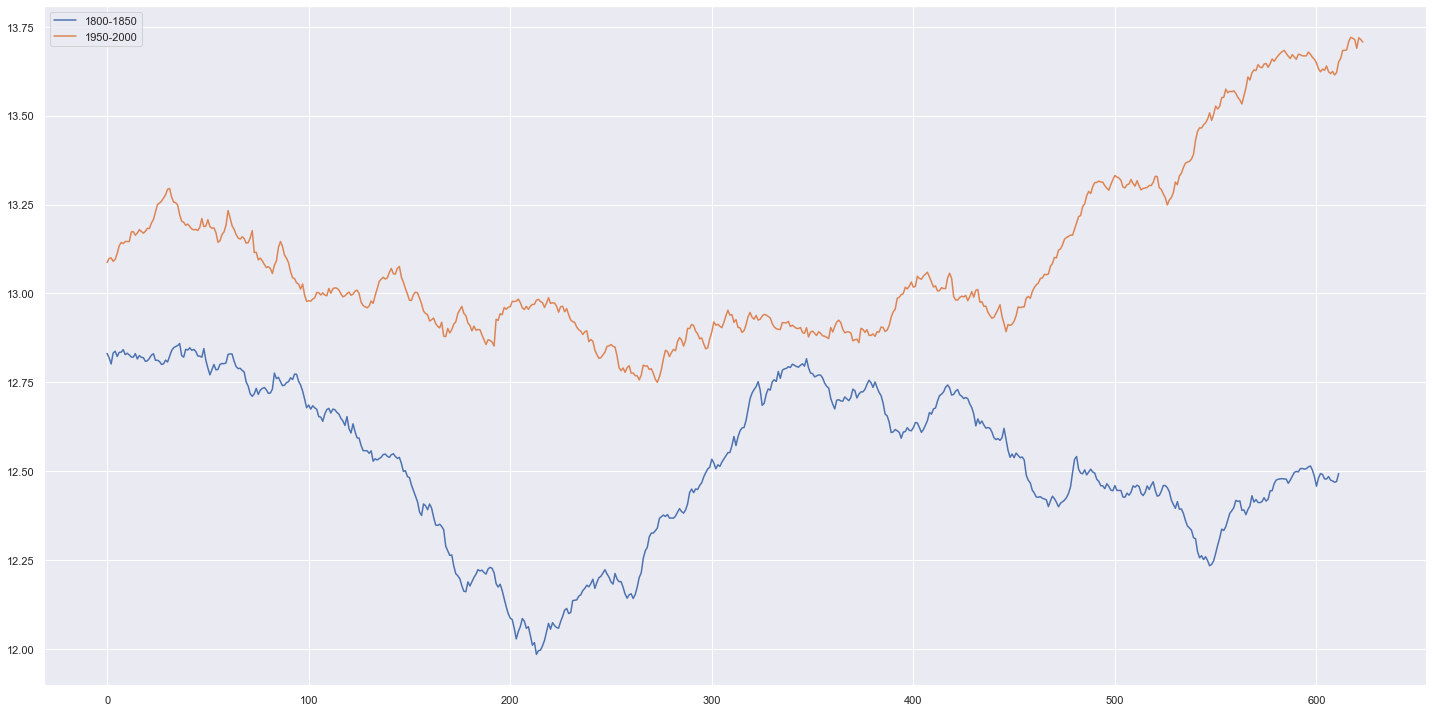

ADF Statistic: -6.088827
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


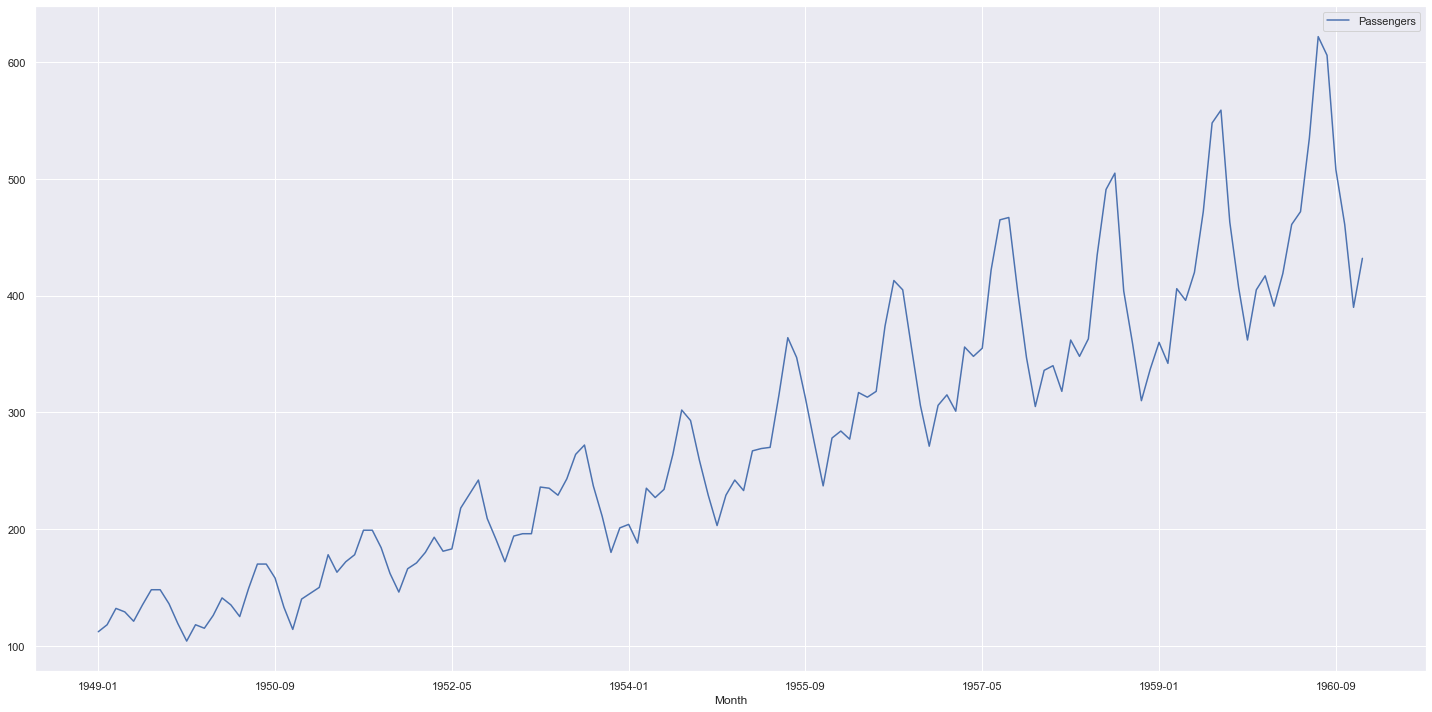

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


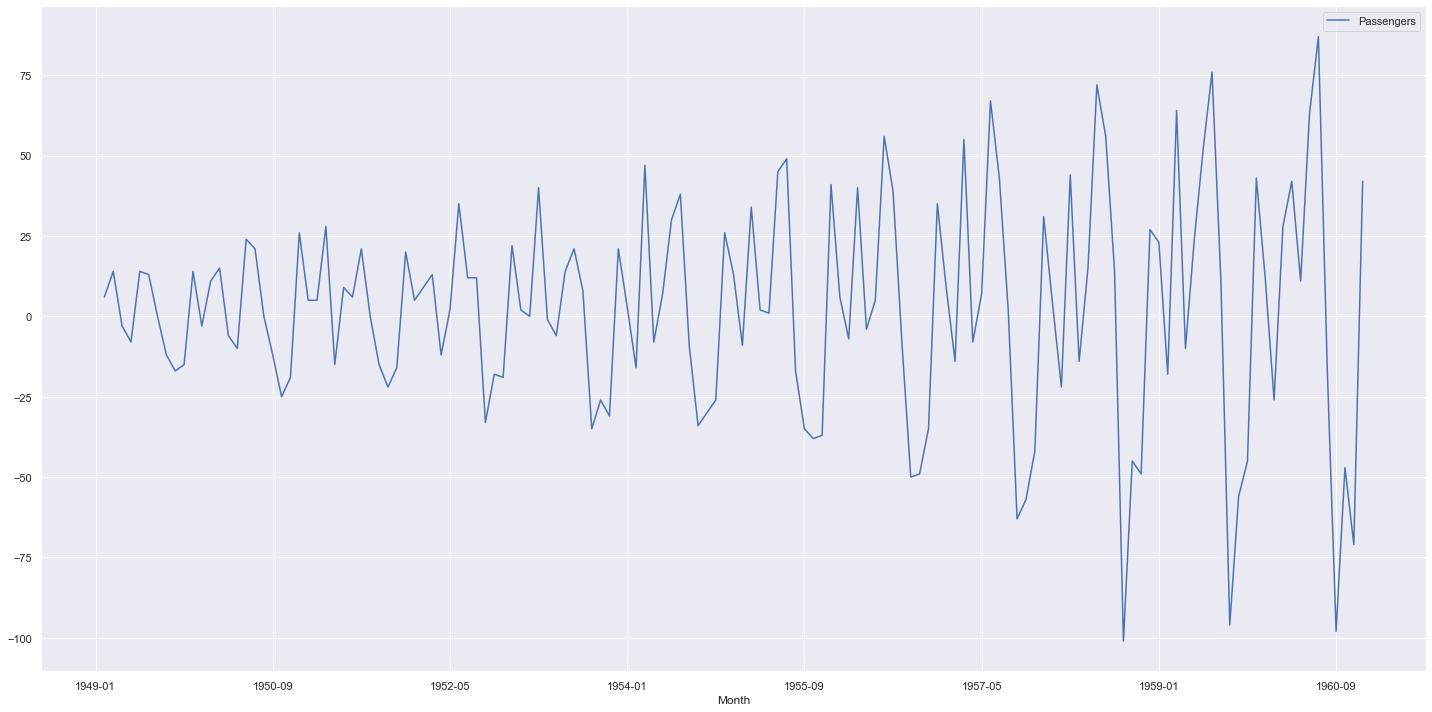

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


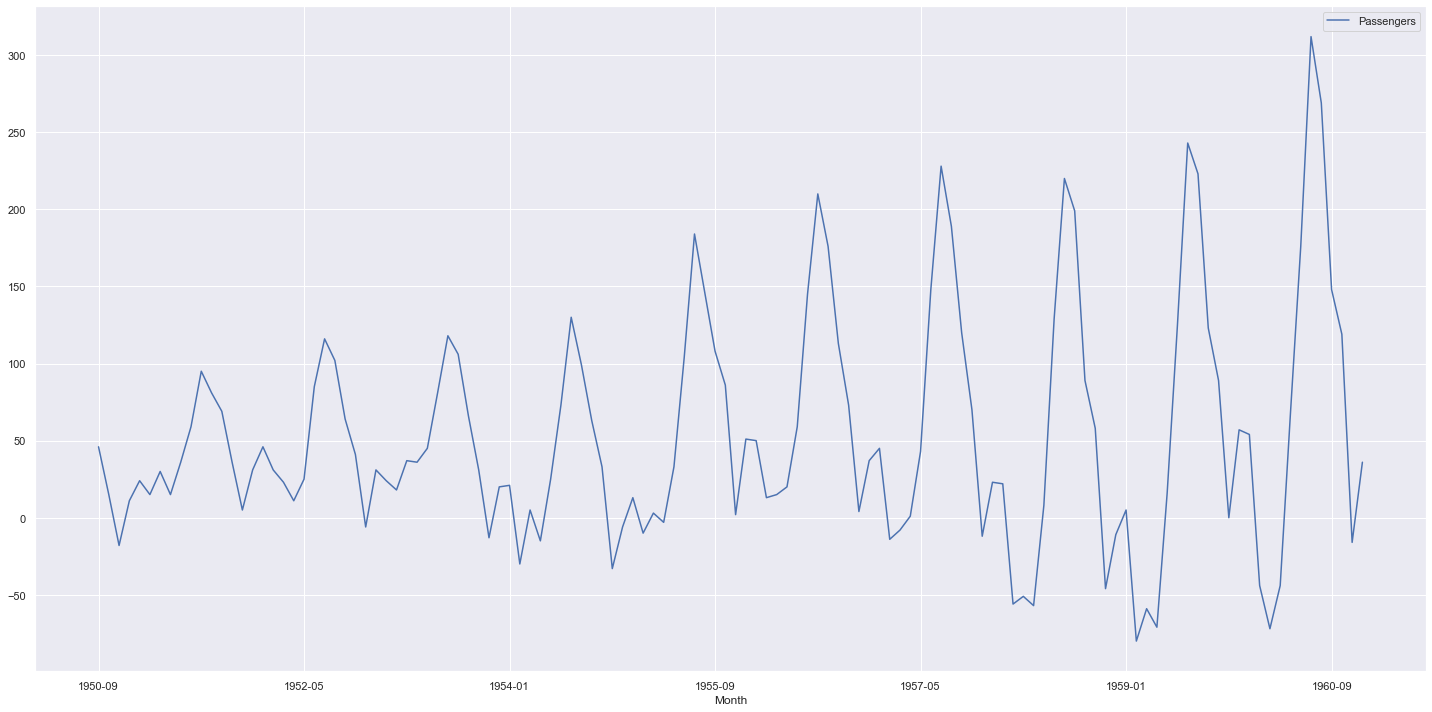

ADF Statistic: -2.908103
p-value: 0.044414
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


## Split le data set
### Introduction
Lorsqu'on fait du Machine learning il est indispensable d'entrainer nos algorithmes sur une partie de notre data set et de tester nos prédictions sur une autre partie dites naïve. On a donc un data set total séparer en **training set** et **test set**, en général on considère que le training set représente 70% du data set total. Cela dépend biensur de la taille du data set et peut être supérieur mais rarement inférieur. Il est également parfois possible d'avoir un **validation set** pour tester nos paramètres, nous en reparlerons plus tard.

### Comment faire le split
Il est indispensable de garder une certaine continuité de variance entre le training et test set. C'est à dire qu'on ne peut pas séparer le data set de nimporte quel façon. Prenons notre exemple concret, si l'on veut prédire la température dans les 30 prochaines années, si l'on coupe notre data set à 70% cela veut dire jusqu'en 1932 pour le training set. Certes cela est après la révolution industrielle mais avant la seconde guerre mondiale et l'accélération du réchauffement climatique. On aura donc un training et un test set qui seront très différent et donc **biaisé**.

## Boostraping 
Il est donc indispensable de "mélanger" le data set grâce au bootstraping, cette méthode permet de mélanger aléatoirement les données. L'aléatoire permet de s'assurer de ne pas avoir de biais conscient mais il peut toujours subsister des biais aléatoires, notamement dans de petits data set comme le notre. On peut donc faire plusieurs fold

- (1) Utiliser la fonction disponoble pour créer des bootstrap de notre time series et faire des plots 
- (2) Faire une fonction qui coupe notre bootstrap data set à 70% en train et test set

Bootstrap Sample: [37, 12, 72, 9, 75, 5, 79, 64, 16, 1, 76, 71, 6, 25, 50, 20, 18, 84, 11, 28]

OOB Sample: [0, 2, 3, 4, 7, 8, 10, 13, 14, 15, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 73, 74, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


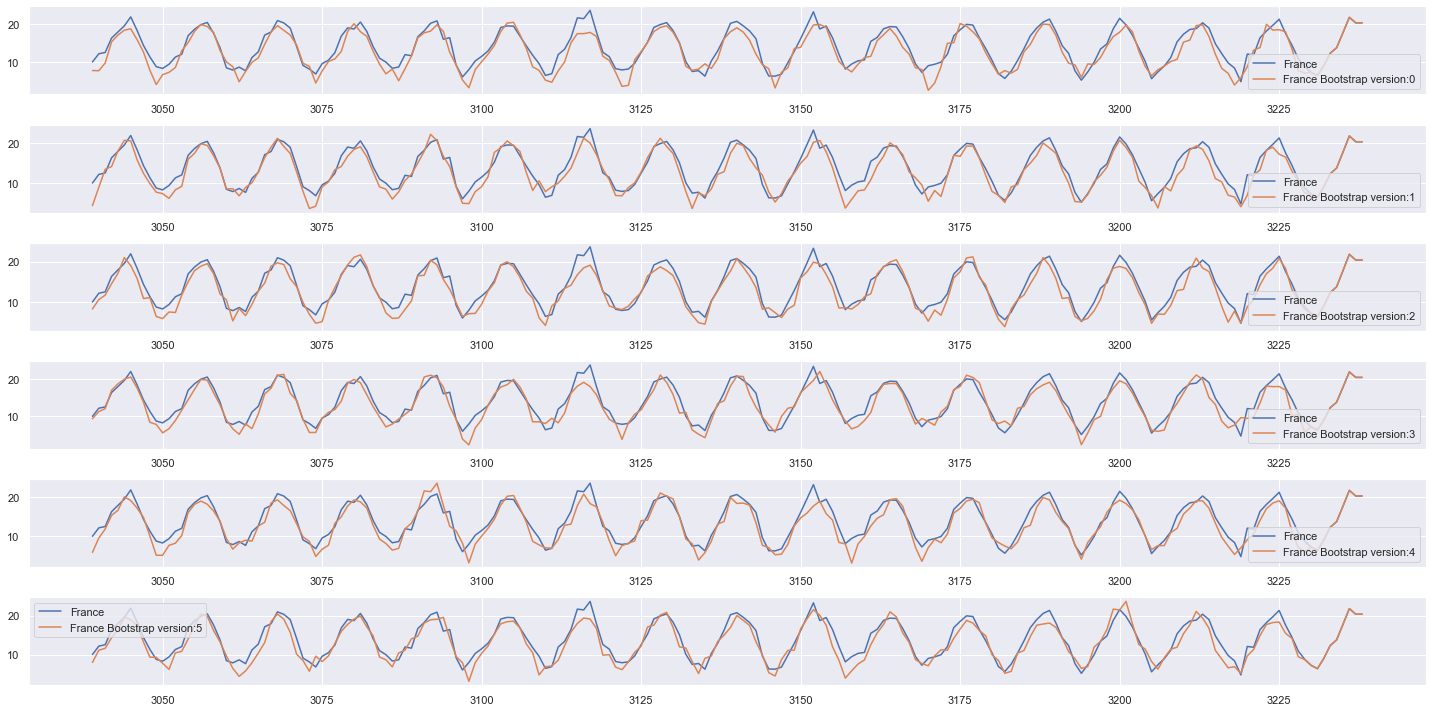

train_split.shape (2267, 8)
test_split.shape (972, 8)


## Scaling
Les machines en général n'aiment pas les gros nombres et ont plus de facilités pour gérer de très petites valeurs. Il est donc indispensable de transormer nos données en décimal. Cependant il faut garder la variance entre les valeurs et ne pas transformer nos données de nimporte quel façon. De même quand on utilise plusieurs types de data différentes par exemples ici la température moyennes mais on pourrait ajouter le CO2 produit, on peut avoir des ordre de grandeurs très différents. La température moyenne oscillera entre -50 et 50 alors que la production de CO2 sera de l'odre de milions voir de miliard. Pour éviter que le réseau de neurones donne un poids trop élevé au CO2 par rapport à la température, il faut donc les normaliser pour qu'il se retrouve dans les mêmes ordres de grandeurs.

Il existe plusieurs fonctions dans sklearn pour normaliser nos données
- Standard ==> y = (x – mean) / standard_deviation


- (1) Coder votre propre fonction pour Standard
- (2) Faire un plot de votre fonction et de la data non normalisée pour la France
- (2) Appliquer la normalisation en utilisant les fonctions de sklearn
     - scaler_train = StandardScaler()
     - scaler_train = scaler_train.fit(data)
         - Tips Reshape en array (len(data), 1)
- (3) Faire un plot de la différence des résultats


Il est également important de scaler sur le training set only puis de faire la transformation sur le test set. En effet, l'objectif est d'avoir aussi peu d'information que possible sur le test set pour reproduire une prédiction naïve losque l'on testera ces nouvelles données. Si l'on fit sur le test set on créera un **data leakage** qui donnera à notre algorithme des informations sur le test set. 

- (4) Fit le scaler sur le training set et appliquer le sur le test set
    - Tips: scaler_train.fit et scaler_train.transform (
        - Tips Reshape en array (len(data), 1)
        
- (5) Utiliser une autre fonction de Sklearn pour normaliser les données
    - MinMaxScaler()
    

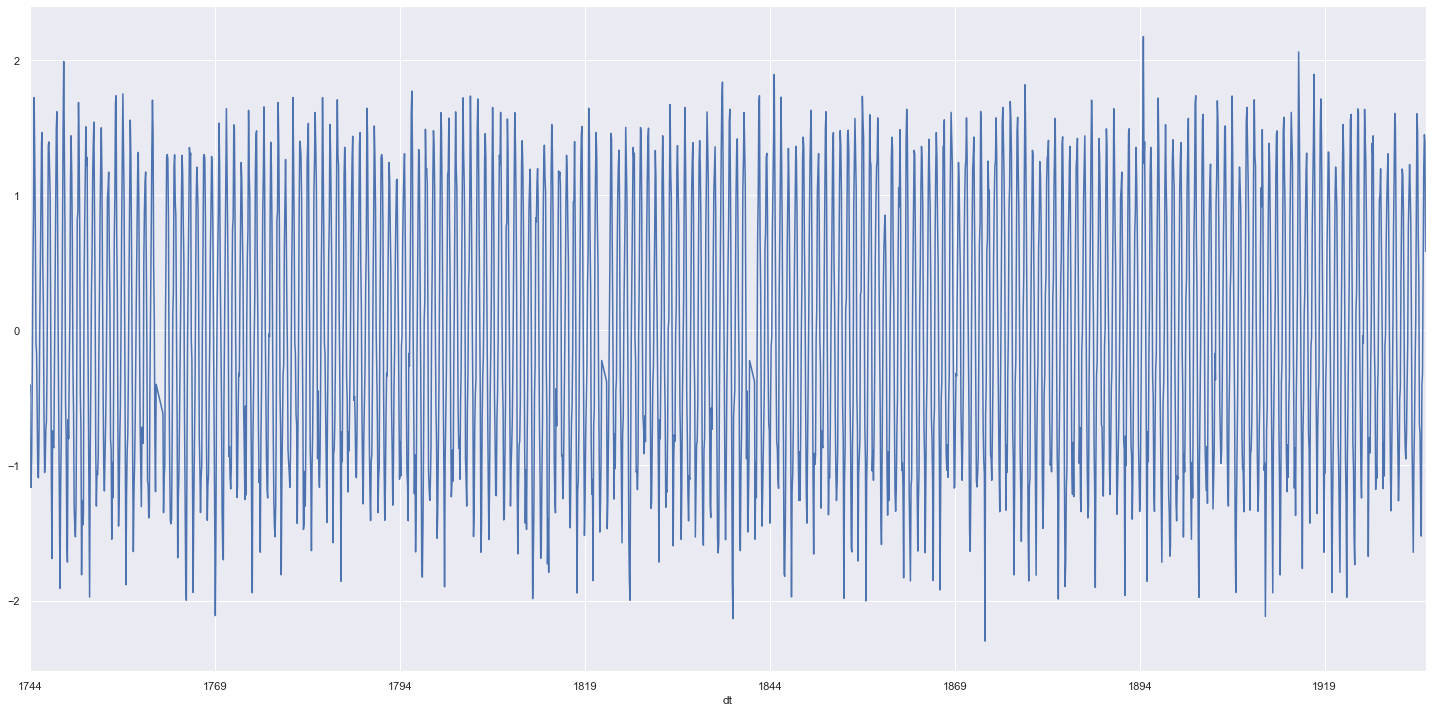

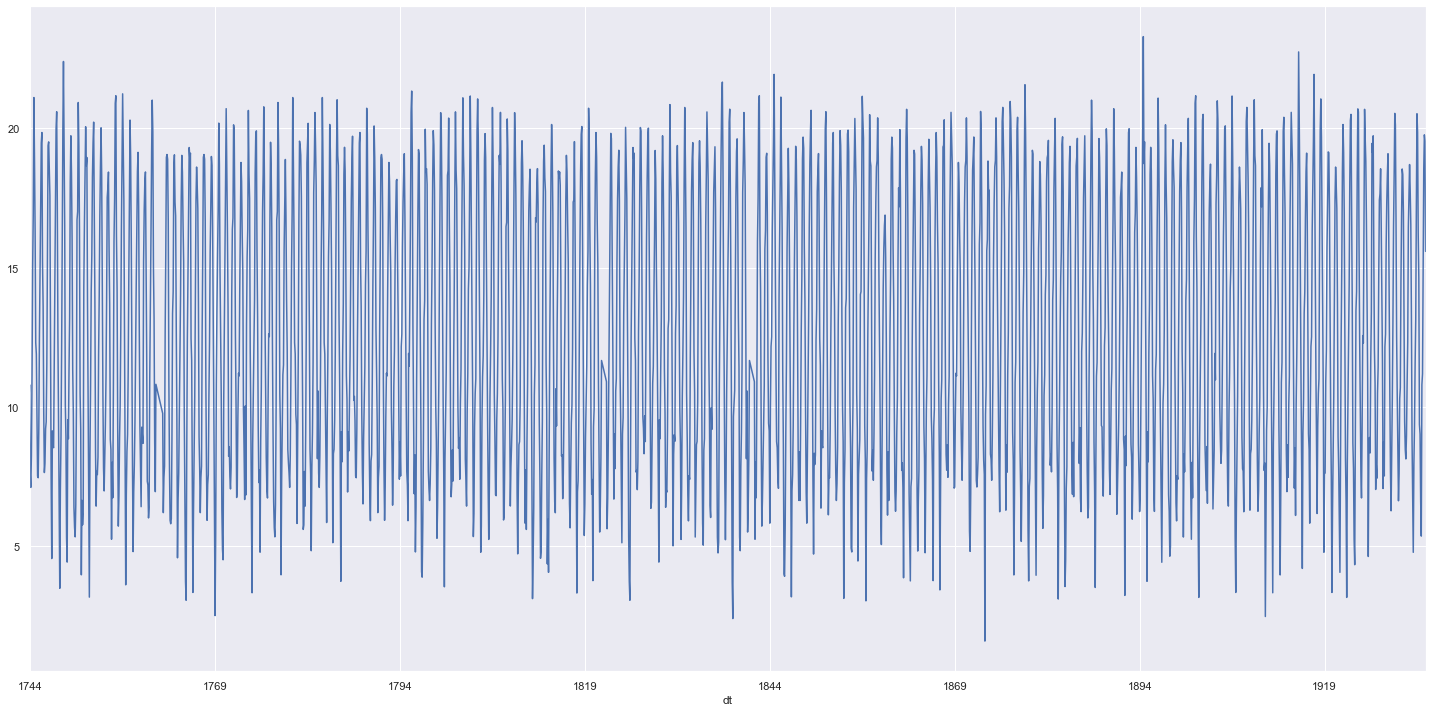

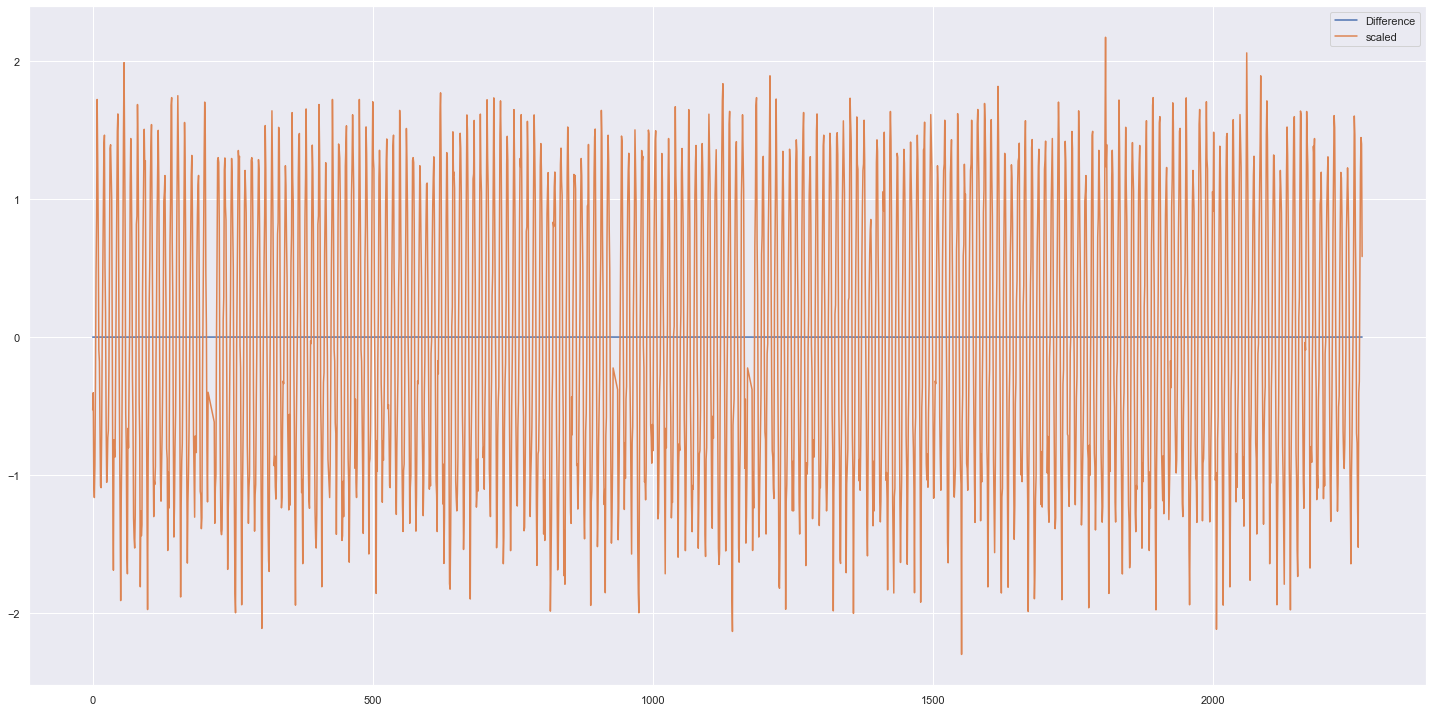

## Préparation de données pour le MLP
Afin de nourrir le Multi layer perceptron il faut que les données du training set soit séparé en deux.
   - Une première partie comme entrainement, pour que l'algorithme utilise ces données afin de faire une prédiction 
   - Une seconde la valeur à prédire
   
Si on a donc une série de 5 valeurs [0, 1, 2 ,3 ,4], on veut utiliser les 4 premières pour prédire la 5eme. De même sur une série plus longue [0, 1, 2 ,3 ,4, 5, 6, 7, 8, 9] on aura donc une première fenêtre:
   - [0, 1, 2, 3] ==> prédire 4
   - [1, 2, 3, 4] ==> prédire 5
   - ...
   - [4, 5, 6, 7] ==> prédire 8
   
Par convention on nomme **X** les données que l'on utilise et **Y** les données que l'on veut prédire


- (1) Créer une fonction qui utilise la séquence suivante [0, 1, 2 ,3 ,4, 5, 6, 7, 8, 9], qui prends 4 valeurs pour en prédire une seule. La fonction doit retourner:
 - **X** = array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])
       
 - **Y** = array([4, 5, 6, 7, 8, 9])
 
 
 
 - (2) Utiliser votre fonction pour les températures moyenne en France sur le train et test set

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
[4 5 6 7 8 9]

(2257, 10, 1)
(2257, 1)

(962, 10, 1)
(962, 1)
